In [9]:
# configure python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# configure matplotlib
import matplotlib
matplotlib.rcParams['figure.dpi']= 250
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'png'


from IPython.display import HTML, display, Markdown
from tabulate import tabulate


import pickle
import numpy as np
from source.rel_path import rootDir

with open(os.path.join(rootDir, 'data', 'final_model_history.pickle'), 'rb') as inFile:
    trainHistory = pickle.load(inFile)

## Loss function value

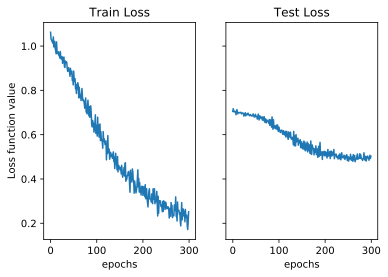

In [10]:
fig, axs = plt.subplots(1, 2, sharey='all')

trainLoss = trainHistory['loss']
testLoss = trainHistory['val_loss']
ticks = np.arange(len(trainLoss))
axs[0].plot(ticks, trainLoss)
axs[1].plot(ticks, testLoss)

axs[0].set_title('Train Loss')
axs[1].set_title('Test Loss')
axs[0].set_ylabel('Loss function value')
axs[0].set_xlabel('epochs')
axs[1].set_xlabel('epochs')
plt.show()

## Last epoch ROC curve

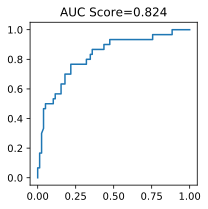

In [11]:
from sklearn.metrics import roc_curve, auc


fig = plt.figure(figsize=(3, 3))
historyDict = trainHistory
y_true = historyDict['y_test_true']
y_pred = historyDict['y_test_pred']
fpr, tpr, thr = roc_curve(y_true, y_pred)
aucScore = auc(fpr, tpr)
testAuc = historyDict['val_auc_roc']
plt.title('AUC Score={:.3f}'.format(aucScore))
plt.plot(fpr, tpr)
plt.show()

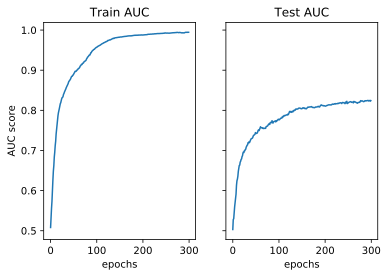

In [12]:
fig, axs = plt.subplots(1, 2, sharey='all')


historyDict = trainHistory
trainAuc = historyDict['precise_train_auc']
testAuc = historyDict['precise_test_auc']
assert len(trainAuc) == len(testAuc)
ticks = np.arange(len(trainAuc))
axs[0].plot(ticks, trainAuc)
axs[1].plot(ticks, testAuc)

axs[0].set_title('Train AUC')
axs[1].set_title('Test AUC')
axs[0].set_ylabel('AUC score')
axs[0].set_xlabel('epochs')
axs[1].set_xlabel('epochs')

plt.show()

## Other performance evaluation metrics

In [13]:
from sklearn.metrics import classification_report


y_true = trainHistory['y_test_true']
y_pred = trainHistory['y_test_pred']
y_pred = y_pred > 0.5
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        78
           1       0.57      0.70      0.63        30

    accuracy                           0.77       108
   macro avg       0.72      0.75      0.73       108
weighted avg       0.79      0.77      0.78       108

